In [1]:
import cufflinks as cf
cf.go_offline(connected=False)

import seaborn as sns

import pandas as pd
import pandas_datareader as pdr
import os

/home/brado/.local/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## identify your security

In [2]:
sec = 'TSLA'

## this pulls daily price data

In [3]:
df = pdr.get_data_yahoo(sec)
print(len(df))
df.head()

1258


High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2015-09-08  49.832001  48.810001  49.009998  49.633999  15691000.0  49.633999
2015-09-09  50.849998  49.660000  50.410000  49.782001  16954000.0  49.782001
2015-09-10  50.144001  49.066002  49.445999  49.695999  13545000.0  49.695999
2015-09-11  50.048000  48.945999  49.528000  50.048000  11754000.0  50.048000
2015-09-14  50.849998  49.933998  50.220001  50.638000  14454500.0  50.638000

In [4]:
pd.set_option('display.max_columns',1000)

pd.set_option('display.max_rows',10000)

def sola(df):
    df.iplot(theme='solar',fill=True)
    
import pandas_ta as pta    
def sto(df):
    #creates a monthly, weekly, and current stochastic
    #adds, them to the data frame, and returns a list of the 
    #names of the columns just added,
    #all in three letters
    df[df.index.name+'_copy'] = df.index
    a = pta.momentum.stoch(df.High,
                      df.Low,
                      df.Close,
                      fast_k=14,
                      slow_k=5,
                      slow_d=3)
    b = pta.momentum.stoch(df.High,
                      df.Low,
                      df.Close,
                      fast_k=14*7,
                      slow_k=5*7,
                      slow_d=3*7)
    c = pta.momentum.stoch(df.High,
                      df.Low,
                      df.Close,
                      fast_k=14*30,
                      slow_k=5*30,
                      slow_d=3*30)
    df = df.join(a)
    df = df.join(b)
    df = df.join(c)
    df
    stoch = []
    for i in df.columns:
        if 'STOCH' in i:
            stoch.append(i)
        hf = []
    for i in df.columns:
        if 'HF' in i:
            hf.append(i)
    hk =[]
    for i in df.columns:
        if 'Hk' in i:
            hk.append(i)
    hd = []
    for i in df.columns:
        if 'Hd' in i:
            hd.append(i)
            
    df['hd_slowave'] = (df[hd[1]] + df[hd[2]])/2
    df['sto_diff'] = (df['hd_slowave'] - df[hd[0]])
    df['riz'] = pta.momentum.rsi(df.Close,length=2)
    df['riz_sto'] = df['sto_diff'] - df['riz']
    
    return df,stoch

In [5]:
sola(df[['Low','High']])

## mixing price data with the stocastic array 
#### (indexed at 0) 

In [6]:
df = df.merge(sto(df)[0])

In [7]:
df

High         Low        Open       Close       Volume   Adj Close  \
0      49.832001   48.810001   49.009998   49.633999   15691000.0   49.633999   
1      50.849998   49.660000   50.410000   49.782001   16954000.0   49.782001   
2      50.144001   49.066002   49.445999   49.695999   13545000.0   49.695999   
3      50.048000   48.945999   49.528000   50.048000   11754000.0   50.048000   
4      50.849998   49.933998   50.220001   50.638000   14454500.0   50.638000   
5      50.919998   49.900002   50.549999   50.714001   14667500.0   50.714001   
6      52.576000   50.576000   50.608002   52.450001   22085500.0   52.450001   
7      53.099998   52.138000   52.792000   52.414001   17929000.0   52.414001   
8      52.764000   51.500000   51.591999   52.124001   18815500.0   52.124001   
9      54.313999   51.160000   52.796001   52.840000   30601000.0   52.840000   
10     52.529999   51.174000   51.806000   52.188000   18322000.0   52.188000   
11     52.416000   51.515999   52.389999   52.212002   13004000.0   52.212002   
12     52.689999   51.242001   51.905998   52.624001   17241000.0   52.624001   
13     53.382000   51.230000   53.321999   51.382000   18867000.0   51.382000   
14     51.958000   49.321999   51.470001   49.686001   24505500.0   49.686001   
15     50.945999   49.091999   50.091999   49.330002   18516000.0   49.330002   
16     50.480000   48.467999   50.400002   49.680000   24648000.0   49.680000   
17     49.700001   47.425999   49.501999   47.976002   22865000.0   47.976002   
18     49.540001   46.986000   47.119999   49.514000   22120000.0   49.514000   
19     49.967999   48.826000   49.768002   49.230000   18449500.0   49.230000   
20     48.605999   47.116001   48.000000   48.292000   26126000.0   48.292000   
21     47.540001   45.824001   47.326000   46.391998   34070000.0   46.391998   
22     46.144001   44.262001   46.015999   45.344002   30666000.0   45.344002   
23     44.874001   43.672001   44.186001   44.138000   30792000.0   44.138000   
24     44.599998   43.054001   44.598000   43.116001   19181500.0   43.116001   
25     44.504002   42.226002   42.655998   43.849998   25857500.0   43.849998   
26     44.189999   43.085999   44.133999   43.375999   15522000.0   43.375999   
27     44.346001   42.740002   43.285999   44.262001   14221000.0   44.262001   
28     46.096001   44.574001   44.608002   45.402000   21672500.0   45.402000   
29     46.230000   44.987999   45.299999   45.619999   12539500.0   45.619999   
30     45.720001   40.400002   45.543999   42.605999   74500000.0   42.605999   
31     42.962002   41.759998   42.397999   42.018002   20757500.0   42.018002   
32     43.150002   41.880001   42.312000   42.344002   14126000.0   42.344002   
33     43.070000   41.537998   43.000000   41.818001   21177500.0   41.818001   
34     43.175999   42.000000   42.276001   43.051998   16957000.0   43.051998   
35     43.419998   41.501999   42.967999   42.070000   17597000.0   42.070000   
36     42.689999   41.660000   42.262001   42.591999   13643000.0   42.591999   
37     42.750000   42.127998   42.349998   42.326000    9025000.0   42.326000   
38     42.326000   40.778000   42.080002   41.386002   22194500.0   41.386002   
39     43.160000   41.444000   41.784000   42.757999   19639500.0   42.757999   
40     42.888000   41.549999   42.770000   41.669998   41662500.0   41.669998   
41     46.548000   45.040001   45.400002   46.326000   63632000.0   46.326000   
42     46.916000   45.838001   46.116001   46.354000   22484000.0   46.354000   
43     46.672001   45.900002   46.139999   46.472000   12226500.0   46.472000   
44     46.598000   44.862000   46.598000   45.066002   19254500.0   45.066002   
45     44.740002   43.216000   44.695999   43.299999   23085000.0   43.299999   
46     43.896000   42.726002   43.554001   43.816002   16739000.0   43.816002   
47     43.799999   42.532001   43.570000   42.588001   14579500.0   42.588001   
48     42.598000   41.304001   42.590000   

In [8]:
from sklearn.preprocessing import StandardScaler
def scale(df):
    scale = StandardScaler()
    scaled = scale.fit_transform(df)
    sdf    = pd.DataFrame(scaled,columns=df.columns)
    return sdf

In [9]:
sola(df[['Close','sto_diff']])

In [10]:
df

High         Low        Open       Close       Volume   Adj Close  \
0      49.832001   48.810001   49.009998   49.633999   15691000.0   49.633999   
1      50.849998   49.660000   50.410000   49.782001   16954000.0   49.782001   
2      50.144001   49.066002   49.445999   49.695999   13545000.0   49.695999   
3      50.048000   48.945999   49.528000   50.048000   11754000.0   50.048000   
4      50.849998   49.933998   50.220001   50.638000   14454500.0   50.638000   
5      50.919998   49.900002   50.549999   50.714001   14667500.0   50.714001   
6      52.576000   50.576000   50.608002   52.450001   22085500.0   52.450001   
7      53.099998   52.138000   52.792000   52.414001   17929000.0   52.414001   
8      52.764000   51.500000   51.591999   52.124001   18815500.0   52.124001   
9      54.313999   51.160000   52.796001   52.840000   30601000.0   52.840000   
10     52.529999   51.174000   51.806000   52.188000   18322000.0   52.188000   
11     52.416000   51.515999   52.389999   52.212002   13004000.0   52.212002   
12     52.689999   51.242001   51.905998   52.624001   17241000.0   52.624001   
13     53.382000   51.230000   53.321999   51.382000   18867000.0   51.382000   
14     51.958000   49.321999   51.470001   49.686001   24505500.0   49.686001   
15     50.945999   49.091999   50.091999   49.330002   18516000.0   49.330002   
16     50.480000   48.467999   50.400002   49.680000   24648000.0   49.680000   
17     49.700001   47.425999   49.501999   47.976002   22865000.0   47.976002   
18     49.540001   46.986000   47.119999   49.514000   22120000.0   49.514000   
19     49.967999   48.826000   49.768002   49.230000   18449500.0   49.230000   
20     48.605999   47.116001   48.000000   48.292000   26126000.0   48.292000   
21     47.540001   45.824001   47.326000   46.391998   34070000.0   46.391998   
22     46.144001   44.262001   46.015999   45.344002   30666000.0   45.344002   
23     44.874001   43.672001   44.186001   44.138000   30792000.0   44.138000   
24     44.599998   43.054001   44.598000   43.116001   19181500.0   43.116001   
25     44.504002   42.226002   42.655998   43.849998   25857500.0   43.849998   
26     44.189999   43.085999   44.133999   43.375999   15522000.0   43.375999   
27     44.346001   42.740002   43.285999   44.262001   14221000.0   44.262001   
28     46.096001   44.574001   44.608002   45.402000   21672500.0   45.402000   
29     46.230000   44.987999   45.299999   45.619999   12539500.0   45.619999   
30     45.720001   40.400002   45.543999   42.605999   74500000.0   42.605999   
31     42.962002   41.759998   42.397999   42.018002   20757500.0   42.018002   
32     43.150002   41.880001   42.312000   42.344002   14126000.0   42.344002   
33     43.070000   41.537998   43.000000   41.818001   21177500.0   41.818001   
34     43.175999   42.000000   42.276001   43.051998   16957000.0   43.051998   
35     43.419998   41.501999   42.967999   42.070000   17597000.0   42.070000   
36     42.689999   41.660000   42.262001   42.591999   13643000.0   42.591999   
37     42.750000   42.127998   42.349998   42.326000    9025000.0   42.326000   
38     42.326000   40.778000   42.080002   41.386002   22194500.0   41.386002   
39     43.160000   41.444000   41.784000   42.757999   19639500.0   42.757999   
40     42.888000   41.549999   42.770000   41.669998   41662500.0   41.669998   
41     46.548000   45.040001   45.400002   46.326000   63632000.0   46.326000   
42     46.916000   45.838001   46.116001   46.354000   22484000.0   46.354000   
43     46.672001   45.900002   46.139999   46.472000   12226500.0   46.472000   
44     46.598000   44.862000   46.598000   45.066002   19254500.0   45.066002   
45     44.740002   43.216000   44.695999   43.299999   23085000.0   43.299999   
46     43.896000   42.726002   43.554001   43.816002   16739000.0   43.816002   
47     43.799999   42.532001   43.570000   42.588001   14579500.0   42.588001   
48     42.598000   41.304001   42.590000   

In [11]:
sdf = scale(df.drop('Date_copy',axis=1))
sdf.index = df['Date_copy']
sola(sdf[['Close','sto_diff']])

## add in fundamentals
### this part is going to have an input option if you say yes then it will add this data... 
### but this is the first run through that will do all the things, the other one will have to be called an UP_DATER

In [12]:
def finding_fun(sec):
    from yahoo_earnings_calendar import YahooEarningsCalendar
    yec = YahooEarningsCalendar()
    data = yec.get_earnings_of(sec)
    fdf = pd.DataFrame(data)
    return fdf

## this lets you know the next earnings report...which is nice...
#### if this doesnt transfer over to the other-df you gotta open a info_df or column

In [13]:
fdf = finding_fun(sec)
fdf

ticker companyshortname             startdatetime startdatetimetype  \
0    TSLA        Tesla Inc  2021-07-20T10:59:00.000Z               TNS   
1    TSLA        Tesla Inc  2021-04-27T10:59:00.000Z               TNS   
2    TSLA        Tesla Inc  2021-01-27T10:59:00.000Z               TNS   
3    TSLA        Tesla Inc  2020-10-21T10:59:00.000Z               TNS   
4    TSLA      Tesla, Inc.  2020-07-22T00:00:00.000Z               TNS   
5    TSLA      Tesla, Inc.  2020-04-29T00:00:00.000Z               TNS   
6    TSLA      Tesla, Inc.  2020-01-29T00:00:00.000Z               TNS   
7    TSLA      Tesla, Inc.  2019-10-23T00:00:00.000Z               TNS   
8    TSLA      Tesla, Inc.  2019-07-24T00:00:00.000Z               TNS   
9    TSLA      Tesla, Inc.  2019-04-24T00:00:00.000Z               TNS   
10   TSLA      Tesla, Inc.  2019-01-30T00:00:00.000Z               TNS   
11   TSLA      Tesla, Inc.  2018-10-24T00:00:00.000Z               TNS   
12   TSLA      Tesla, Inc.  2018-08-01T00:00:00.000Z               TNS   
13   TSLA      Tesla, Inc.  2018-05-02T00:00:00.000Z               TNS   
14   TSLA        Tesla Inc  2018-02-07T21:00:00.000Z               AMC   
15   TSLA      Tesla, Inc.  2018-02-07T00:00:00.000Z               TNS   
16   TSLA        Tesla Inc  2017-11-01T20:00:00.000Z               AMC   
17   TSLA      Tesla, Inc.  2017-11-01T00:00:00.000Z               TNS   
18   TSLA        Tesla Inc  2017-08-02T20:00:00.000Z               AMC   
19   TSLA      Tesla, Inc.  2017-08-02T00:00:00.000Z               TNS   
20   TSLA        Tesla Inc  2017-05-03T20:00:00.000Z               AMC   
21   TSLA      Tesla, Inc.  2017-05-03T00:00:00.000Z               TNS   
22   TSLA        Tesla Inc  2017-02-22T21:00:00.000Z               AMC   
23   TSLA      Tesla, Inc.  2017-02-22T00:00:00.000Z               TNS   
24   TSLA      Tesla, Inc.  2016-10-26T00:00:00.000Z               TNS   
25   TSLA      Tesla, Inc.  2016-08-03T00:00:00.000Z               TNS   
26   TSLA      Tesla, Inc.  2016-05-04T00:00:00.000Z               TNS   
27   TSLA      Tesla, Inc.  2016-02-10T00:00:00.000Z               TNS   
28   TSLA      Tesla, Inc.  2015-11-03T00:00:00.000Z               TNS   
29   TSLA      Tesla, Inc.  2015-08-05T00:00:00.000Z               TNS   
30   TSLA      Tesla, Inc.  2015-05-06T00:00:00.000Z               TNS   
31   TSLA      Tesla, Inc.  2015-02-11T00:00:00.000Z               TNS   
32   TSLA      Tesla, Inc.  2014-11-05T00:00:00.000Z               TNS   
33   TSLA      Tesla, Inc.  2014-07-31T00:00:00.000Z               TNS   
34   TSLA      Tesla, Inc.  2014-05-07T00:00:00.000Z               TNS   
35   TSLA      Tesla, Inc.  2014-02-19T00:00:00.000Z               TNS   
36   TSLA      Tesla, Inc.  2013-11-05T00:00:00.000Z               TNS   
37   TSLA      Tesla, Inc.  2013-08-07T00:00:00.000Z               TNS   
38   TSLA      Tesla, Inc.  2013-05-08T00:00:00.000Z               TNS   
39   TSLA      Tesla, Inc.  2013-02-20T00:00:00.000Z               TNS   
40   TSLA      Tesla, Inc.  2012-11-05T00:00:00.000Z               TNS   
41   TSLA      Tesla, Inc.  2012-07-25T00:00:00.000Z               TNS   
42   TSLA      Tesla, Inc.  2012-05-09T00:00:00.000Z               TNS   
43   TSLA      Tesla, Inc.  2012-02-15T00:00:00.000Z               TNS   
44   TSLA      Tesla, Inc.  2011-11-02T00:00:00.000Z               TNS   
45   TSLA      Tesla, Inc.  2011-08-03T00:00:00.000Z               TNS   
46   TSLA      Tesla, Inc.  2011-05-04T00:00:00.000Z               TNS   
47   TSLA      Tesla, Inc.  2011-02-15T00:00:00.000Z               TNS   
48   TSLA      Tesla, Inc.  2010-11-09T00:00:00.000Z               TNS   

    epsestimate  epsactual  epssurprisepct timeZoneShortName  \
0           NaN        NaN             NaN               EDT   
1           NaN        NaN             NaN               EDT   
2           NaN        NaN             NaN               EDT   
3          0.53        NaN             NaN    

In [14]:
import time

In [15]:
len(fdf)

49

In [16]:
fdf.set_index('startdatetime',inplace=True)

In [17]:
fdf.index.name = 'Date'

In [18]:
fdf

ticker companyshortname startdatetimetype  \
Date                                                                 
2021-07-20T10:59:00.000Z   TSLA        Tesla Inc               TNS   
2021-04-27T10:59:00.000Z   TSLA        Tesla Inc               TNS   
2021-01-27T10:59:00.000Z   TSLA        Tesla Inc               TNS   
2020-10-21T10:59:00.000Z   TSLA        Tesla Inc               TNS   
2020-07-22T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2020-04-29T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2020-01-29T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2019-10-23T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2019-07-24T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2019-04-24T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2019-01-30T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2018-10-24T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2018-08-01T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2018-05-02T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2018-02-07T21:00:00.000Z   TSLA        Tesla Inc               AMC   
2018-02-07T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2017-11-01T20:00:00.000Z   TSLA        Tesla Inc               AMC   
2017-11-01T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2017-08-02T20:00:00.000Z   TSLA        Tesla Inc               AMC   
2017-08-02T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2017-05-03T20:00:00.000Z   TSLA        Tesla Inc               AMC   
2017-05-03T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2017-02-22T21:00:00.000Z   TSLA        Tesla Inc               AMC   
2017-02-22T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2016-10-26T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2016-08-03T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2016-05-04T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2016-02-10T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2015-11-03T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2015-08-05T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2015-05-06T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2015-02-11T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2014-11-05T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2014-07-31T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2014-05-07T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2014-02-19T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2013-11-05T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2013-08-07T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2013-05-08T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2013-02-20T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2012-11-05T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2012-07-25T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2012-05-09T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2012-02-15T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2011-11-02T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2011-08-03T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2011-05-04T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2011-02-15T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   
2010-11-09T00:00:00.000Z   TSLA      Tesla, Inc.               TNS   

                          epsestimate  epsactual  epssurprisepct  \
Date                                                               
2021-07-20T10:59:00.000Z          NaN        NaN             NaN   
2021-04-27T10:59:00.000Z          NaN        NaN             NaN   
2021-01-27T10:59:00.000Z          NaN        NaN             NaN   
2020-10-21T10:59:00.000Z         0.53        NaN             NaN   
2020-07-22T00:00:00.000Z         0.03       0.

In [19]:
fdf.index = pd.to_datetime(fdf.index)

In [20]:
fdf.index = fdf.index.date
fdf

ticker companyshortname startdatetimetype  epsestimate  epsactual  \
2021-07-20   TSLA        Tesla Inc               TNS          NaN        NaN   
2021-04-27   TSLA        Tesla Inc               TNS          NaN        NaN   
2021-01-27   TSLA        Tesla Inc               TNS          NaN        NaN   
2020-10-21   TSLA        Tesla Inc               TNS         0.53        NaN   
2020-07-22   TSLA      Tesla, Inc.               TNS         0.03       0.44   
2020-04-29   TSLA      Tesla, Inc.               TNS        -0.25       0.23   
2020-01-29   TSLA      Tesla, Inc.               TNS         1.72       0.41   
2019-10-23   TSLA      Tesla, Inc.               TNS        -0.42       0.37   
2019-07-24   TSLA      Tesla, Inc.               TNS        -0.36      -0.22   
2019-04-24   TSLA      Tesla, Inc.               TNS        -0.69      -0.58   
2019-01-30   TSLA      Tesla, Inc.               TNS         2.20       1.93   
2018-10-24   TSLA      Tesla, Inc.               TNS        -0.19       2.90   
2018-08-01   TSLA      Tesla, Inc.               TNS        -2.92      -3.06   
2018-05-02   TSLA      Tesla, Inc.               TNS        -3.58      -3.35   
2018-02-07   TSLA        Tesla Inc               AMC        -3.12      -3.04   
2018-02-07   TSLA      Tesla, Inc.               TNS        -3.09      -3.04   
2017-11-01   TSLA        Tesla Inc               AMC        -2.29      -2.92   
2017-11-01   TSLA      Tesla, Inc.               TNS        -2.20      -2.92   
2017-08-02   TSLA        Tesla Inc               AMC        -1.82      -1.33   
2017-08-02   TSLA      Tesla, Inc.               TNS        -1.82      -1.33   
2017-05-03   TSLA        Tesla Inc               AMC        -0.81      -1.33   
2017-05-03   TSLA      Tesla, Inc.               TNS        -0.81      -1.33   
2017-02-22   TSLA        Tesla Inc               AMC        -0.43      -0.69   
2017-02-22   TSLA      Tesla, Inc.               TNS        -0.43      -0.69   
2016-10-26   TSLA      Tesla, Inc.               TNS        -0.54       0.71   
2016-08-03   TSLA      Tesla, Inc.               TNS        -0.51      -1.61   
2016-05-04   TSLA      Tesla, Inc.               TNS        -0.58      -1.45   
2016-02-10   TSLA      Tesla, Inc.               TNS         0.10      -0.87   
2015-11-03   TSLA      Tesla, Inc.               TNS        -0.49      -0.58   
2015-08-05   TSLA      Tesla, Inc.               TNS        -0.60      -0.48   
2015-05-06   TSLA      Tesla, Inc.               TNS        -0.50      -0.36   
2015-02-11   TSLA      Tesla, Inc.               TNS         0.31      -0.13   
2014-11-05   TSLA      Tesla, Inc.               TNS        -0.01       0.02   
2014-07-31   TSLA      Tesla, Inc.               TNS         0.04       0.11   
2014-05-07   TSLA      Tesla, Inc.               TNS         0.10       0.12   
2014-02-19   TSLA      Tesla, Inc.               TNS         0.21       0.33   
2013-11-05   TSLA      Tesla, Inc.               TNS         0.11       0.12   
2013-08-07   TSLA      Tesla, Inc.               TNS        -0.17       0.20   
2013-05-08   TSLA      Tesla, Inc.               TNS         0.04       0.12   
2013-02-20   TSLA      Tesla, Inc.               TNS        -0.53      -0.65   
2012-11-05   TSLA      Tesla, Inc.               TNS        -0.90      -0.92   
2012-07-25   TSLA      Tesla, Inc.               TNS        -0.92      -0.89   
2012-05-09   TSLA      Tesla, Inc.               TNS        -0.69      -0.76   
2012-02-15   TSLA      Tesla, Inc.               TNS        -0.63      -0.69   
2011-11-02   TSLA      Tesla, Inc.               TNS        -0.59      -0.55   
2011-08-03   TSLA      Tesla, Inc.               TNS        -0.51      -0.53   
2011-05-04   TSLA      Tesla, Inc.               TNS        -0.51      -0.44   
2011-02-15   TSLA      Tesla, Inc.               TNS        -0.50      -0.47   
2010-11-09   TSLA      Tesla, Inc.               TNS        -0.43      -0.37   

          

In [21]:
df['Date'] = df['Date_copy']
df.set_index('Date',inplace=True)
df

High         Low        Open       Close       Volume  \
Date                                                                      
2015-09-08   49.832001   48.810001   49.009998   49.633999   15691000.0   
2015-09-09   50.849998   49.660000   50.410000   49.782001   16954000.0   
2015-09-10   50.144001   49.066002   49.445999   49.695999   13545000.0   
2015-09-11   50.048000   48.945999   49.528000   50.048000   11754000.0   
2015-09-14   50.849998   49.933998   50.220001   50.638000   14454500.0   
2015-09-15   50.919998   49.900002   50.549999   50.714001   14667500.0   
2015-09-16   52.576000   50.576000   50.608002   52.450001   22085500.0   
2015-09-17   53.099998   52.138000   52.792000   52.414001   17929000.0   
2015-09-18   52.764000   51.500000   51.591999   52.124001   18815500.0   
2015-09-21   54.313999   51.160000   52.796001   52.840000   30601000.0   
2015-09-22   52.529999   51.174000   51.806000   52.188000   18322000.0   
2015-09-23   52.416000   51.515999   52.389999   52.212002   13004000.0   
2015-09-24   52.689999   51.242001   51.905998   52.624001   17241000.0   
2015-09-25   53.382000   51.230000   53.321999   51.382000   18867000.0   
2015-09-28   51.958000   49.321999   51.470001   49.686001   24505500.0   
2015-09-29   50.945999   49.091999   50.091999   49.330002   18516000.0   
2015-09-30   50.480000   48.467999   50.400002   49.680000   24648000.0   
2015-10-01   49.700001   47.425999   49.501999   47.976002   22865000.0   
2015-10-02   49.540001   46.986000   47.119999   49.514000   22120000.0   
2015-10-05   49.967999   48.826000   49.768002   49.230000   18449500.0   
2015-10-06   48.605999   47.116001   48.000000   48.292000   26126000.0   
2015-10-07   47.540001   45.824001   47.326000   46.391998   34070000.0   
2015-10-08   46.144001   44.262001   46.015999   45.344002   30666000.0   
2015-10-09   44.874001   43.672001   44.186001   44.138000   30792000.0   
2015-10-12   44.599998   43.054001   44.598000   43.116001   19181500.0   
2015-10-13   44.504002   42.226002   42.655998   43.849998   25857500.0   
2015-10-14   44.189999   43.085999   44.133999   43.375999   15522000.0   
2015-10-15   44.346001   42.740002   43.285999   44.262001   14221000.0   
2015-10-16   46.096001   44.574001   44.608002   45.402000   21672500.0   
2015-10-19   46.230000   44.987999   45.299999   45.619999   12539500.0   
2015-10-20   45.720001   40.400002   45.543999   42.605999   74500000.0   
2015-10-21   42.962002   41.759998   42.397999   42.018002   20757500.0   
2015-10-22   43.150002   41.880001   42.312000   42.344002   14126000.0   
2015-10-23   43.070000   41.537998   43.000000   41.818001   21177500.0   
2015-10-26   43.175999   42.000000   42.276001   43.051998   16957000.0   
2015-10-27   43.419998   41.501999   42.967999   42.070000   17597000.0   
2015-10-28   42.689999   41.660000   42.262001   42.591999   13643000.0   
2015-10-29   42.750000   42.127998   42.349998   42.326000    9025000.0   
2015-10-30   42.326000   40.778000   42.080002   41.386002   22194500.0   
2015-11-02   43.160000   41.444000   41.784000   42.757999   19639500.0   
2015-11-03   42.888000   41.549999   42.770000   41.669998   41662500.0   
2015-11-04   46.548000   45.040001   45.400002   46.326000   63632000.0   
2015-11-05   46.916000   45.838001   46.116001   46.354000   22484000.0   
2015-11-06   46.672001   45.900002   46.139999   46.472000   12226500.0   
2015-11-09   46.598000   44.862000   46.598000   45.066002   19254500.0   
2015-11-10   44.740002   43.216000   44.695999   43.299999   23085000.0   
2015-11-11   43.896000   42.726002   43.554001   43.816002   16739000.0   
2015-11-12   43.799999   42.532001   43.570000   42.588001   14579500.0   
2015-11-13   42.598000   41.304001   42.590000   41.438000   17151500.0   
2015-11-16   42.995998   41.160000   41.217999   42.862000   14627000.0   
2015-11-17   43.200001   42.279999   43.040001   42.799999   10743500.0   
2015-11-18   44.276001   42.504002   42.900

In [22]:
mdf = df.join(fdf)

In [23]:
print(len(mdf))

1263


## a look at whats missing


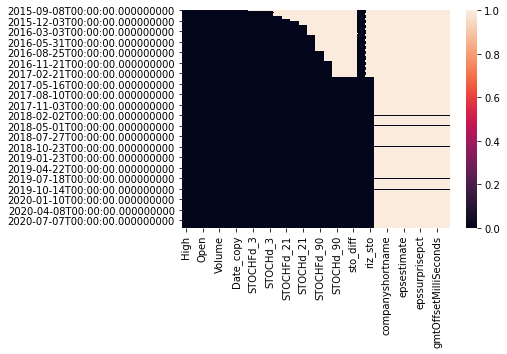

In [24]:
sns.heatmap(mdf.isnull())

In [25]:
mdf = mdf.fillna(method='ffill')

## just making sure it filled the right way

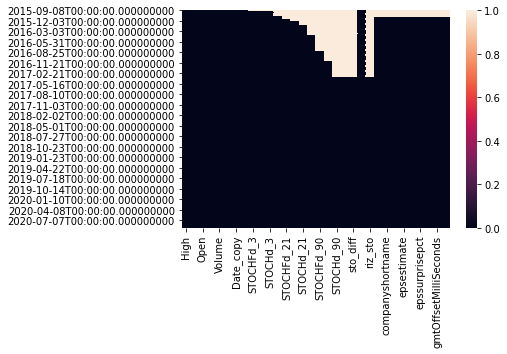

In [26]:
sns.heatmap(mdf.isnull())

## save it

In [60]:
os.listdir('../../Falling Furry/data/')

['TSLA.csv']

In [59]:
path = '../../Falling Furry/data/'
if not os.path.exists(path):
    os.mkdir(path)
shepana = (path+sec+'.csv')
mdf.to_csv(shepana)

## lets see if she worked

In [28]:
sdf = mdf.reset_index().drop('Date_copy',axis=1)

In [29]:
sdf = sdf.drop(['timeZoneShortName',
          'quoteType',
          'companyshortname',
          'ticker',
          'startdatetimetype',
                'index'],axis=1)


In [30]:
eps = []
for i in sdf.columns:
    if 'eps' in i:
        eps.append(i)
eps

['epsestimate', 'epsactual', 'epssurprisepct']

In [31]:
sola(scale(sdf[['Close','sto_diff',eps[0],eps[1],eps[2]]]))
